In [1]:
import pandas
import matplotlib.pyplot as pyplot
import rollingAnalysis
from datetime import datetime
import custom_pyplot

sales = pandas.read_csv("sales.csv").drop('Unnamed: 0', axis = 1)
daily_sales = pandas.read_csv("daily_sales.csv")
orders = pandas.read_csv("orders.csv")
pizza_properties = pandas.read_csv("pizza_properties.csv")
ingredient_properties = pandas.read_csv("ingredient_properties.csv")

daily_sales.index = daily_sales["Unnamed: 0"].tolist()
daily_sales = daily_sales.drop('Unnamed: 0', axis = 1)
orders.index = orders["Unnamed: 0"].tolist()
orders = orders.drop('Unnamed: 0', axis = 1)
pizza_properties.index = pizza_properties["Unnamed: 0"].tolist()
pizza_properties = pizza_properties.drop('Unnamed: 0', axis = 1)
ingredient_properties.index = ingredient_properties["Unnamed: 0"].tolist()
ingredient_properties = ingredient_properties.drop('Unnamed: 0', axis = 1)

#convert ingredients to lists
sales["pizza_ingredients"] = sales["pizza_ingredients"].apply(lambda ingredients: ingredients.split(", "))
pizza_properties["ingredients"] = pizza_properties["ingredients"].apply(lambda ingredients: ingredients.split(", "))
ingredient_properties["pizza_types_containing"] = ingredient_properties["pizza_types_containing"].apply(lambda ingredients: ingredients.split(", "))

In [2]:
"$" + str(sales["total_price"].sum())
# revenue

'$817860.05'

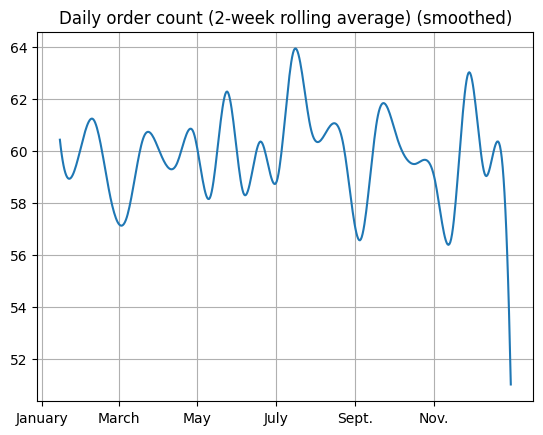

In [3]:
rollingAnalysis.plotRollingData(
    ["order_count"], daily_sales,
    13, spline = 12, legend = False
)
pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.title("Daily order count (2-week rolling average) (smoothed)")
pyplot.grid()

pyplot.savefig('imageout/orders_per_day_spline_graph.png', dpi=500)

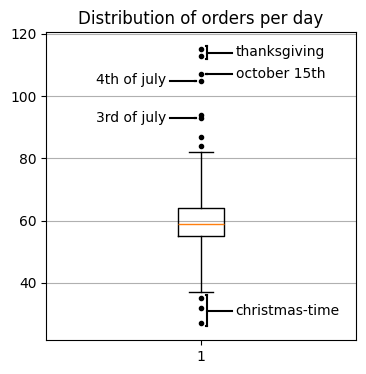

In [17]:
pyplot.figure(figsize = (4, 4))
pyplot.boxplot(x = daily_sales["order_count"], whis = 2, flierprops = dict(markerfacecolor = "black", marker = "."))
pyplot.grid(axis = "y")
pyplot.title("Distribution of orders per day")
axes = pyplot.subplot()
custom_pyplot.addHorizontalForkedLabel(axes, "thanksgiving", 0.1, 1, 0.02, 112, 116, direction = "right", text_nudge = (0.011, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "october 15th", 0.1, 1, 0.02, 107, 107, direction = "right", text_nudge = (0.011, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "3rd of july", 0.1, 1, 0.02, 93, 93, direction = "left", text_nudge = (-0.24, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "4th of july", 0.1, 1, 0.02, 105, 105, direction = "left", text_nudge = (-0.24, -1.25))
custom_pyplot.addHorizontalForkedLabel(axes, "christmas-time", 0.1, 1, 0.02, 26, 36, direction = "right", text_nudge = (0.01, -1.25))

pyplot.savefig('imageout/orders_per_day_boxplot.png', dpi=500)

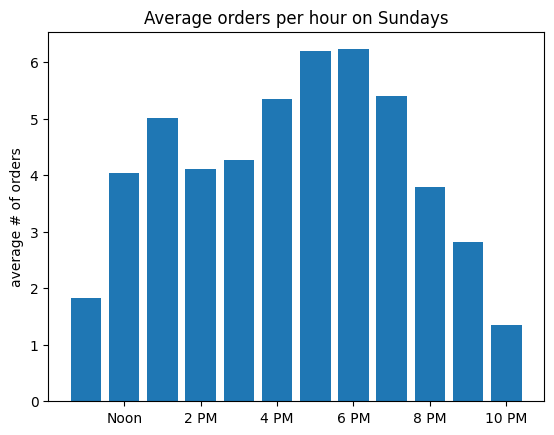

In [5]:
for weekday in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
    pyplot.clf()
    orders_this_weekday = orders[orders["order_date_weekday"] == weekday]
    order_times = orders_this_weekday["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
    number_of_days = len(orders_this_weekday["order_date_index"].unique())

    time_counts = order_times.value_counts()

    pyplot.bar(
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
        [time_counts.loc[i]/number_of_days for i in range(11, 23)]
    )

    pyplot.xticks([12, 14, 16, 18, 20, 22], ["Noon", "2 PM", "4 PM", "6 PM", "8 PM", "10 PM"])
    pyplot.ylabel("average # of orders")
    pyplot.title("Average orders per hour on %ss" %(weekday))
    pyplot.savefig('imageout/orders_per_hour_%s.png' %(weekday.lower()), dpi=500)

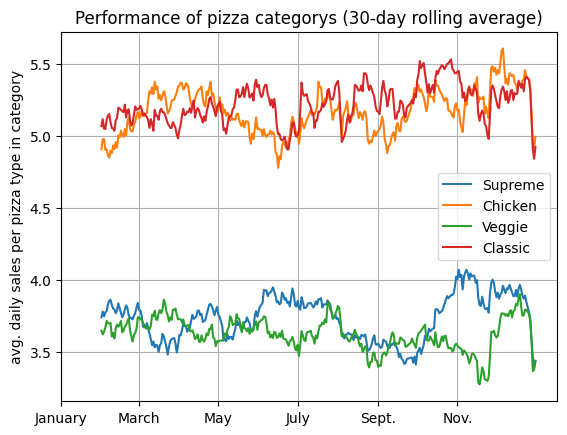

In [45]:
for category in ["Supreme", "Chicken", "Veggie", "Classic"]:
    modifier = pizza_properties["category"].value_counts()[category]
    size_sales_by_day = sales[sales["pizza_category"] == category][["order_date_index", "quantity"]].groupby("order_date_index").sum()
    out = pandas.DataFrame(columns = ["%s" %(category)])
    for order_date_index in daily_sales.index:
        try:
            sales_today = size_sales_by_day["quantity"][order_date_index]
        except:
            sales_today = 0
        out.loc[order_date_index] = sales_today

    rollingAnalysis.plotRollingData(["%s" %(category)], out, 30, spline=0, scales=[1/modifier])

pyplot.xticks([0, 60, 121, 182, 244, 305], ["January", "March", "May", "July", "Sept.", "Nov."])
pyplot.ylabel("avg. daily sales per item in category")
pyplot.title("Performance of pizza categories (30-day rolling average)")
pyplot.grid()
pyplot.savefig('imageout/categories.png', dpi=500)


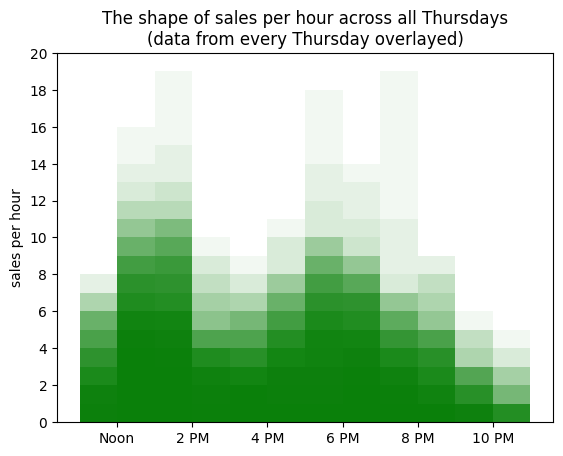

In [49]:
# overlay bar graphs of which hours people are ordering food

for date_index in range(1, 365, 7):
    orders_this_day = orders[orders["order_date_index"] == date_index]
    order_times = orders_this_day["order_time"].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour)
    pyplot.hist(order_times, bins = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], alpha = 0.05, color = "green")

pyplot.xticks([12, 14, 16, 18, 20, 22], ["Noon", "2 PM", "4 PM", "6 PM", "8 PM", "10 PM"])
pyplot.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
#pyplot.grid(axis = "y", alpha=0.2)
#pyplot.subplot().set_axisbelow(True)
pyplot.ylabel("sales per hour")
pyplot.title("The shape of sales per hour across all Thursdays\n(data from every Thursday overlayed)")
pyplot.savefig('imageout/thursdays.png', dpi=500)
    